# Max Flow

In [3]:
import numpy as np
import networkx as nx

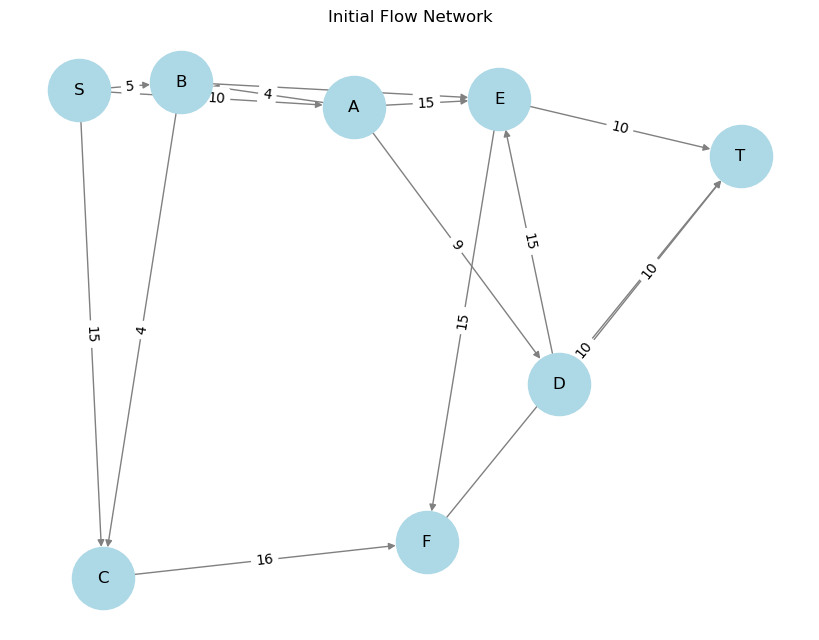

Maximum Flow: 25


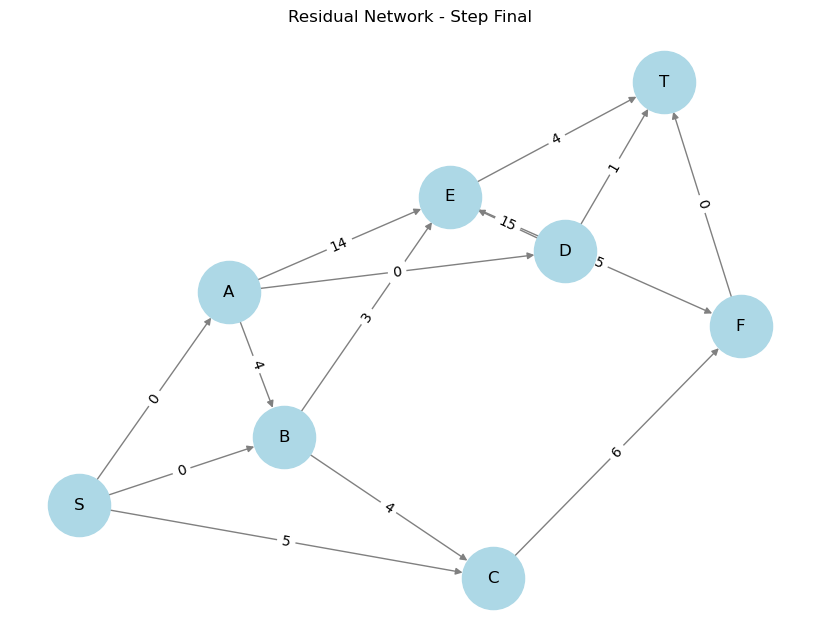

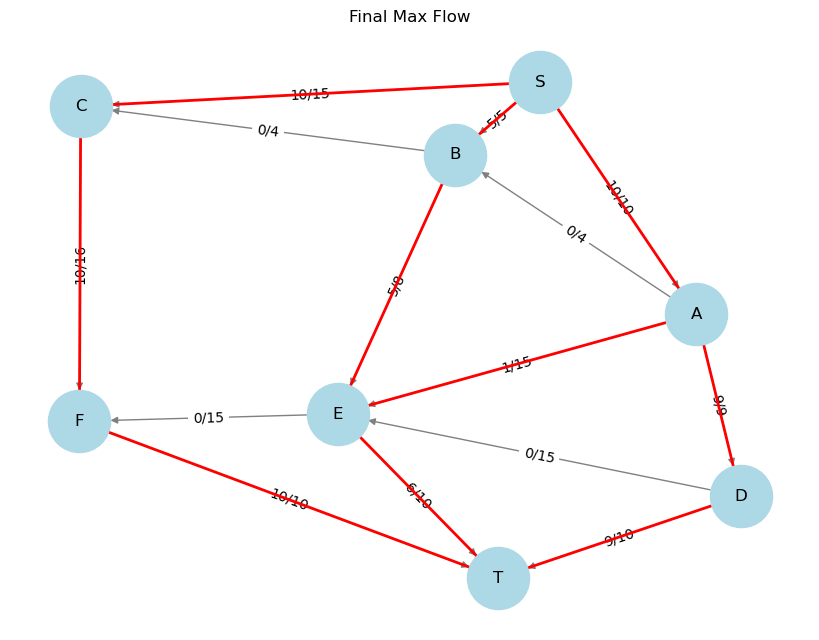

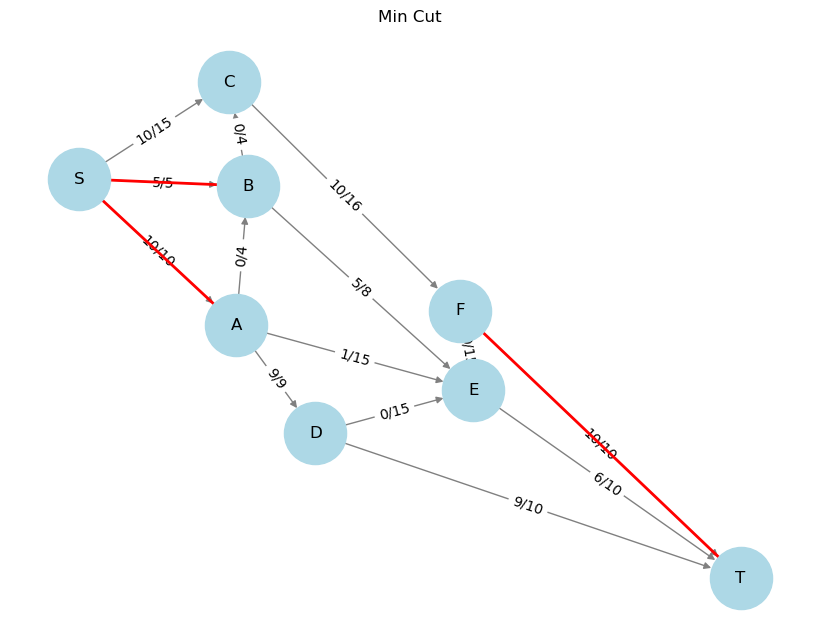

In [8]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_graph(G, flow_dict=None, title="Graph", highlight_edges=None):
    """
    Draws the graph with flow values if provided.
    """
    pos = nx.spring_layout(G)  # Positioning nodes
    plt.figure(figsize=(8, 6))

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=12)
    
    # Draw edge labels (capacity or flow values)
    edge_labels = {(u, v): f"{G[u][v]['capacity']}" for u, v in G.edges()}
    if flow_dict:
        edge_labels = {(u, v): f"{flow_dict[u][v]}/{G[u][v]['capacity']}" for u, v in G.edges()}
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    # Highlight certain edges (for min-cut or max flow paths)
    if highlight_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlight_edges, edge_color="red", width=2)

    plt.title(title)
    plt.show()


def visualize_residual_graph(G, residual_G, step):
    """
    Visualizes the residual graph at a given step.
    """
    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=12)
    
    # Draw residual capacities
    residual_labels = {(u, v): f"{residual_G[u][v]['capacity']}" for u, v in residual_G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=residual_labels, font_size=10)
    
    plt.title(f"Residual Network - Step {step}")
    plt.show()


def ford_fulkerson_demo():
    """
    Demonstrates the Ford-Fulkerson algorithm with visualizations.
    """
    # Step 1: Create a directed graph with capacities
    G = nx.DiGraph()
    edges = [
        ("S", "A", 10), ("S", "B", 5), ("S", "C", 15),
        ("A", "B", 4), ("A", "D", 9), ("A", "E", 15),
        ("B", "C", 4), ("B", "E", 8),
        ("C", "F", 16),
        ("D", "E", 15), ("D", "T", 10),
        ("E", "F", 15), ("E", "T", 10),
        ("F", "T", 10)
    ]
    
    for u, v, capacity in edges:
        G.add_edge(u, v, capacity=capacity)

    draw_graph(G, title="Initial Flow Network")

    # Step 2: Compute Max Flow using Ford-Fulkerson
    source, sink = "S", "T"
    max_flow, flow_dict = nx.maximum_flow(G, source, sink)

    print(f"Maximum Flow: {max_flow}")

    # Step 3: Visualize Residual Network at Steps
    residual_G = G.copy()
    for u in G.nodes():
        for v in G.nodes():
            if residual_G.has_edge(u, v):
                residual_G[u][v]['capacity'] -= flow_dict[u][v]
    
    visualize_residual_graph(G, residual_G, step="Final")

    # Step 4: Highlight the Optimal Flow Path in Red
    flow_edges = [(u, v) for u, v in G.edges() if flow_dict[u][v] > 0]
    draw_graph(G, flow_dict, title="Final Max Flow", highlight_edges=flow_edges)

    # Step 5: Compute and Highlight the Min Cut
    _, partition = nx.minimum_cut(G, source, sink)
    reachable, non_reachable = partition  # Extract the two node groups
    cut_edges = [(u, v) for u in reachable for v in G[u] if v in non_reachable]
    draw_graph(G, flow_dict, title="Min Cut", highlight_edges=cut_edges)


# Run the Demo
ford_fulkerson_demo()